In [2]:
from graphviz import Digraph
from graphviz import Graph
from tree_structures import Node, Taxonomy
from queue import Queue
import graphviz

In [3]:
SAVE_DIR = 'visualization'

### Drawing AST Trees

In [5]:
def build_ast(string, max_k=None):
    if max_k is None:
        max_k = len(string)
    root = Node(index='0', name='root', parent=None, children=None)
    for k in range(max_k):  # for each k-suffix
        suffix = string[k:]
        curr_parent = root
        for i, char in enumerate(suffix):
            flag = True  # this flag is true if char is not in current parent children list
            for child in curr_parent:
                if child.name == char:
                    flag = False
                    child.freq += 1
                    curr_parent = child
                    break
            if flag:
                child = Node(index=f'{i}.{k}', name=char, parent=curr_parent, children=None)
                child.freq = 1
                curr_parent = child
    return root


def ast_tree2img(root, filename, save_dir):
    e = Graph(name='AST', filename=filename, format='pdf', directory=save_dir)

    e.attr('node', shape='box')
    queue = Queue()
    queue.put(root)
    e.node(root.index, root.name)  # create root
    while not queue.empty():
        node = queue.get()
        for child in node:
            queue.put(child)
            e.node(child.index, f'{child.name} [{child.freq}]')
            e.edge(node.index, child.index)
    e.render(filename, cleanup=True)
    return e  

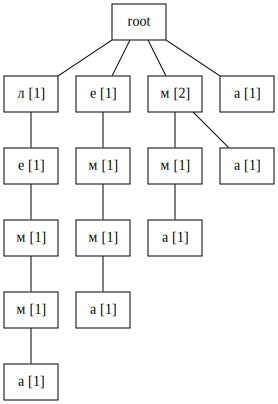

In [8]:
STRING = 'лемма'
max_k = len(STRING)  # if max_k==len(STRING) -> building full AST


root = build_ast(STRING, max_k)
 
if max_k == len(STRING): max_k = 'full'  # name for saving
ast_tree2img(root, f'AST/AST_{STRING}_{max_k}', SAVE_DIR)

---

### Drawing Taxonomy Trees

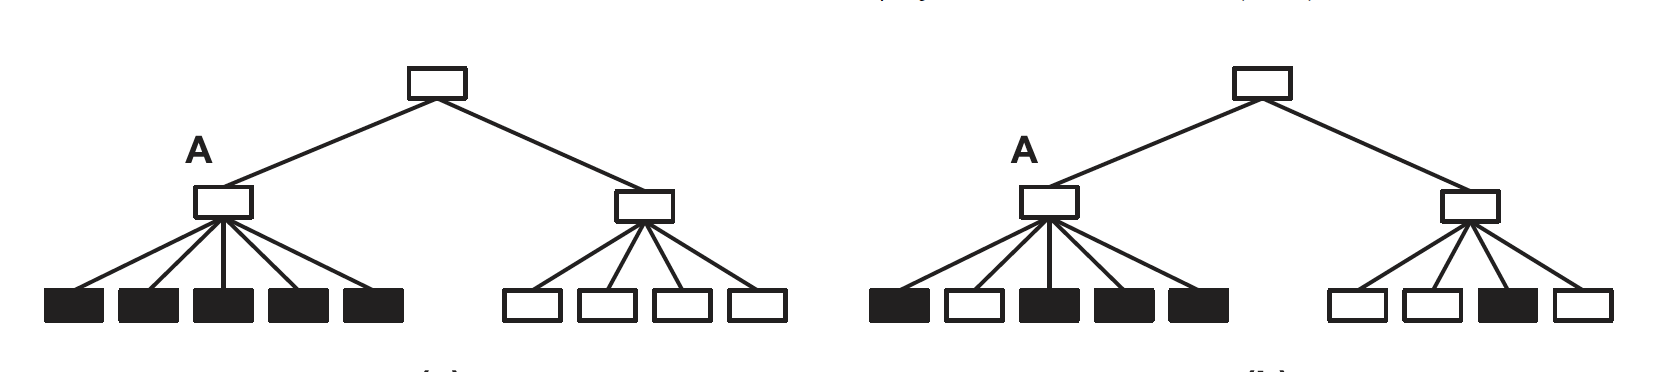

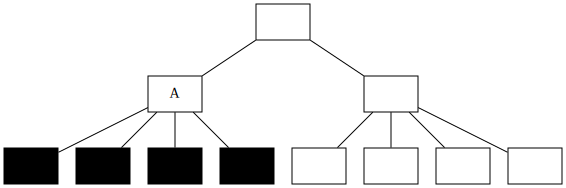

In [11]:
e = graphviz.Digraph('ParGen', filename='clear_left_branch', format='pdf', directory=SAVE_DIR)

e.attr('node', shape='box')
e.node(name='root', label='')
e.node(name='A', label='A')
e.node(name='B', label='')
e.edge('root', 'A', arrowhead='none', penwidth='1')
e.edge('root', 'B',  arrowhead='none', penwidth='1')



e.node(name='A1', label='', style='filled', fillcolor='black')
e.node(name='A2', label='', style='filled', fillcolor='black')
e.node(name='A3', label='', style='filled', fillcolor='black')
e.node(name='A4', label='', style='filled', fillcolor='black')

e.edge('A', 'A1', arrowhead='none', penwidth='1')
e.edge('A', 'A2', arrowhead='none', penwidth='1')
e.edge('A', 'A3', arrowhead='none', penwidth='1')
e.edge('A', 'A4', arrowhead='none', penwidth='1')



e.node(name='B1', label='',
#        width='0', height='0'
      )
e.node(name='B2', label='')
e.node(name='B3', label='')
e.node(name='B4', label='')

e.edge('B', 'B1', arrowhead='none', penwidth='1')
e.edge('B', 'B2', arrowhead='none', penwidth='1')
e.edge('B', 'B3', arrowhead='none', penwidth='1')
e.edge('B', 'B4', arrowhead='none', penwidth='1')

e.render('taxonomies/clear_left_brunch', cleanup=True)
e

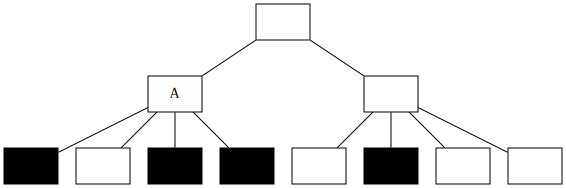

In [12]:
e = graphviz.Digraph('ParGen', filename='messy_left_branch', format='pdf', directory=SAVE_DIR)


e.attr('node', shape='box')
e.node(name='root', label='')
e.node(name='A', label='A')
e.node(name='B', label='')
e.edge('root', 'A', arrowhead='none', penwidth='1')
e.edge('root', 'B',  arrowhead='none', penwidth='1')


e.node(name='A1', label='', style='filled', fillcolor='black')
e.node(name='A2', label='')
e.node(name='A3', label='', style='filled', fillcolor='black')
e.node(name='A4', label='', style='filled', fillcolor='black')

e.edge('A', 'A1', arrowhead='none', penwidth='1')
e.edge('A', 'A2', arrowhead='none', penwidth='1')
e.edge('A', 'A3', arrowhead='none', penwidth='1')
e.edge('A', 'A4', arrowhead='none', penwidth='1')


e.node(name='B1', label='',
#        width='0', height='0'
      )
e.node(name='B2', label='', style='filled', fillcolor='black')
e.node(name='B3', label='')
e.node(name='B4', label='')

e.edge('B', 'B1', arrowhead='none', penwidth='1')
e.edge('B', 'B2', arrowhead='none', penwidth='1')
e.edge('B', 'B3', arrowhead='none', penwidth='1')
e.edge('B', 'B4', arrowhead='none', penwidth='1')
e.attr(fontsize='200')

e.render('taxonomies/messy_left_branch', cleanup=True)
e

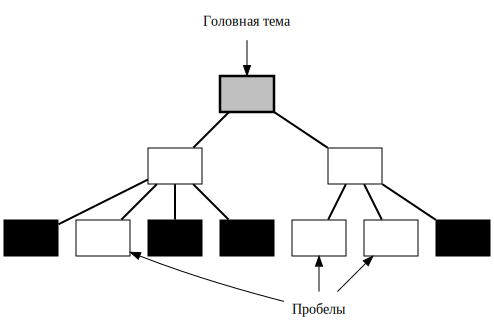

In [13]:
e = graphviz.Digraph('ParGen', filename='taxonomy_lift_root', format='pdf', directory=SAVE_DIR)

e.attr('node', shape='box')
e.node(name='root', label='', style='filled', fillcolor='grey', penwidth='2.5')
e.node(name='A',label='', style='filled', fillcolor='white')
e.node(name='B',label='', style='filled', fillcolor='white')


e.edge('root', 'A', arrowhead='none', penwidth='2')
e.edge('root', 'B',  arrowhead='none', penwidth='2')



e.node(name='A1', style='filled', fillcolor='black')
e.node(name='A2', label='')
e.node(name='A3', style='filled', fillcolor='black')
e.node(name='A4', style='filled', fillcolor='black')
e.edge('A', 'A1', arrowhead='none', penwidth='2')
e.edge('A', 'A2', arrowhead='none', penwidth='2')
e.edge('A', 'A3', arrowhead='none', penwidth='2')
e.edge('A', 'A4', arrowhead='none', penwidth='2')



e.node(name='B1',label=''
#        , width='0', height='0'
      )
e.node(name='B2',label='')
e.node(name='B3', style='filled', fillcolor='black')
# e.node(name='B4',label='')

e.edge('B', 'B1', arrowhead='none', penwidth='2')
e.edge('B', 'B2', arrowhead='none', penwidth='2')
e.edge('B', 'B3', arrowhead='none', penwidth='2')
# e.edge('B', 'B4', arrowhead='none', penwidth='2')


e.node('Пробелы', color='White')
e.edge('A2', 'Пробелы', dir='back')
e.edge('B1', 'Пробелы', dir='back')
e.edge('B2', 'Пробелы', dir='back')
# e.edge('B4', 'Пробелы', dir='back')
e.node('Головная тема', color='white')
e.edge('Головная тема','root')

e.render('taxonomies/taxonomy_lift_root', cleanup=True)
e

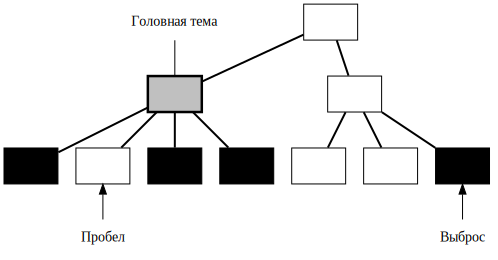

In [14]:
e = graphviz.Digraph('ParGen', filename='lift_left_branch', format='pdf', directory=SAVE_DIR)
e.attr('node', shape='box')
e.node(name='root', label='',
#        style='filled', fillcolor='black'
      )
e.node(name='A', label='',style='filled', fillcolor='grey', penwidth='2.5')
e.node(name='B', label='', 
#        style='filled', fillcolor='black'
      )
e.edge('root', 'A', arrowhead='none', penwidth='2')
e.edge('root', 'B',  arrowhead='none', penwidth='2')



e.node(name='A1',label='',
       style='filled', fillcolor='black'
      )
e.node(name='A2', label='')
e.node(name='A3', label='',
       style='filled', fillcolor='black'
      )
e.node(name='A4', style='filled', fillcolor='black')
e.edge('A', 'A1', arrowhead='none', penwidth='2')
e.edge('A', 'A2', arrowhead='none', penwidth='2')
e.edge('A', 'A3', arrowhead='none', penwidth='2')
e.edge('A', 'A4', arrowhead='none', penwidth='2')



e.node(name='B1',label=''
#        , width='0', height='0'
      )
e.node(name='B2',label='')
e.node(name='B3', style='filled', fillcolor='black')
# e.node(name='B4',label='')

e.edge('B', 'B1', arrowhead='none', penwidth='2')
e.edge('B', 'B2', arrowhead='none', penwidth='2')
e.edge('B', 'B3', arrowhead='none', penwidth='2')
# e.edge('B', 'B4', arrowhead='none', penwidth='2')


e.node('Пробел', color='White')
e.edge('A2', 'Пробел', dir='back')

e.node('Выброс', color='White')
e.edge('B3', 'Выброс', dir='back')
# e.edge('B1', 'Пробелы', dir='back')
# e.edge('B2', 'Пробелы', dir='back')
# e.edge('B4', 'Пробелы', dir='back')
e.node('Головная тема', color='white')
e.edge('Головная тема','A', color='black', arrowhead='none')
e.render('taxonomies/taxonomy_lift_left_branch', cleanup=True)
e

---

---

In [15]:
import pandas as pd
from ete3 import TextFace, Tree, TreeStyle, NodeStyle

In [17]:
n_lvls = 2
branches = [2, 3, 4, 5]
taxonomy = pd.read_csv('input_data/taxonomies/taxonomy_df.csv', index_col=0)
if branches:
    mask = (taxonomy.level.str.startswith(str(branches[0])))
    for i in range(1, len(branches)):
        mask = mask | (taxonomy.level.str.startswith(str(branches[i])))
    mask = mask &(taxonomy['depth']<=n_lvls)
else:
    mask = (taxonomy['depth']<=n_lvls)
taxonomy = taxonomy[mask]  # taking first 2 lvls


# replacing large phrases to fit into some paper standards 
taxonomy.replace(to_replace='Data management systemsACM-2', value='DMS', inplace=True)
taxonomy.replace(to_replace='Information systems applications', value='InfoSys Applications', inplace=True)
taxonomy.replace(to_replace='World Wide Web', value='Web', inplace=True)


taxonomy = Taxonomy(taxonomy)

In [20]:
def tree2nhx(node, depth=0):
    output = ''
    if node.is_internal:
        output += '('
        n_children = len(node.children)
        for k, child in enumerate(reversed(node.children)):
            output += tree2nhx(child, depth + 1)
            if k < n_children - 1:
                output += ','
        output += ')'
    output += node.name
    output += f'[&&NHX:index={node.index}]'
    if depth == 0:
        output += ';'
    return output


def layout(node):
    if node.is_root():
        node.img_style['size'] = 0
    else:
        name = TextFace(f'{node.index}--{node.name}', tight_text=False, fsize=10)
        name = TextFace(f'{node.name}', tight_text=False, fsize=10)
        name.rotation = 270
        node.add_face(name, column=0, position="branch-right")

        st = NodeStyle()
        st['size'] = 10
        st['fgcolor'] = 'black'
        node.set_style(st)


def draw_tree(root, save_dir, n_lvls):
    ts = TreeStyle()
    ts.rotation = 90
    ts.show_leaf_name = False
    ts.show_scale = False
    ts.layout_fn = layout
    ts.scale = 30  # branch length in pixels
    ts.branch_vertical_margin = 6  # pixels between adjacent branches
    nhx_string = tree2nhx(root)
    tree = Tree(nhx_string, format=1)
    tree.render(f'{save_dir}/taxonomies/tax_{n_lvls}_levels.pdf', tree_style=ts, units='px', h=455,)
    return tree.render("%%inline",tree_style=ts)


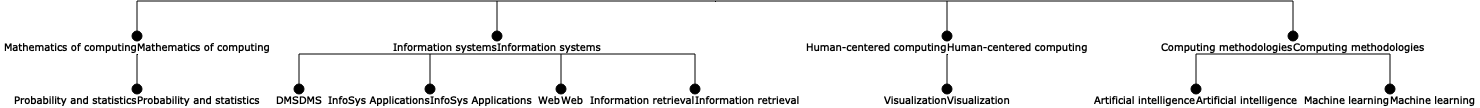

In [21]:
draw_tree(taxonomy.root, SAVE_DIR, n_lvls)